In [21]:
def test(word):
    ans = 0
    i = 0
    alen = len(word)
    while i < alen-1:
        if (word[i] == word[i+1]):
            ans += 1
            i += 2
        else:
            i += 1
    return ans      

In [29]:
words = [
    'keyhbmeknckfavrpqyyfjxjjmivtsftikovkcdcwefctqrqjryhtlcvstm',
    'rpqipvntglpsbmoyxpjhkfufrxgnqjvhtizxn',
    'sddpeibedjk',
    'dkxqcthvgmzymoohniertqanrbkfdolfwfaalwolqpipngsaquxurvzwjpfejkfyys',
    'jdzsnpejkyqktrdlljfuozlfsvrhqrwgtojnxllzmbfvoexxxttzcbprwzyztsovcxootxoswbffcokhtosfvn',
    'hwqfvaiqxdksxvbtcr'
]

for word in words:
    print(test(word))

2
0
1
3
6
0


In [1]:
import tensorflow as tf
import time
import numpy as np

/home/hung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def tfgaussmf(tensor_x, tensor_mean, tensor_sigma):
    """
    """
    num = -tf.square(tf.subtract(tensor_x, tensor_mean))
    den = 2*tf.square(tensor_sigma)
    return tf.exp(tf.divide(num, den))

In [3]:
def tfcartesian_prod(tensor1, tensor2):
    """
    Calculate Cartesian product of two tensor, shaped (?, n)
    """
    expand1 = tf.expand_dims(tf.tile(tf.expand_dims(tensor1, 2), [1,1,tf.shape(tensor2)[1]]),3)
    expand2 = tf.expand_dims(tf.tile(tf.expand_dims(tensor2, 1), [1,tf.shape(tensor1)[1],1]),3)
    
    return tf.concat([expand1, expand2], axis=3)
    

In [28]:
n_inputs = 4
n_mfs = 3
inputs = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs))

mu = tf.get_variable(
            name='mu'+str(int(time.time())), 
            shape=[n_inputs,n_mfs],
            initializer=tf.random_normal_initializer(0.1, 1)
        )

sigma = tf.get_variable(
            name='sigma'+str(int(time.time())), 
            shape=[n_inputs, n_mfs],
            initializer=tf.random_normal_initializer(0.1, 1)
        )

In [29]:
sess = tf.Session()

In [30]:
sess.run(tf.global_variables_initializer())

In [31]:
sess.run(mu)

array([[ 0.46895108,  0.5488527 , -1.6986952 ],
       [ 2.063364  ,  0.35692728, -2.535194  ],
       [-0.7841001 , -2.261228  , -1.9507598 ],
       [-0.2344056 ,  0.6115022 ,  0.8802714 ]], dtype=float32)

In [32]:
sess.run(sigma)

array([[ 0.25609007,  0.4687098 ,  0.21125892],
       [ 1.8641732 ,  1.2001027 , -0.7911516 ],
       [-0.799164  ,  0.45345116, -2.8722756 ],
       [-0.5447669 ,  0.5937943 ,  1.7643518 ]], dtype=float32)

In [33]:
dataX = np.array([[1,2,3,5],[4,5,6,7]])

In [34]:
# transform input
int1 = tf.reshape(inputs, (-1, n_inputs, 1))
int2 = tf.reshape(tf.tile(int1, (1,1,n_mfs)), (-1, n_inputs, n_mfs))

In [35]:
sess.run(int2, {inputs:dataX})

array([[[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.],
        [5., 5., 5.]],

       [[4., 4., 4.],
        [5., 5., 5.],
        [6., 6., 6.],
        [7., 7., 7.]]], dtype=float32)

In [36]:
layer1 = tfgaussmf(tensor_x=int2, tensor_mean=mu, tensor_sigma=sigma)
sess.run(layer1, {inputs:dataX})

array([[[1.16475455e-01, 6.29246533e-01, 3.67321788e-36],
        [9.99422491e-01, 3.91710877e-01, 7.31920125e-08],
        [1.35319260e-05, 5.85321256e-30, 2.26397723e-01],
        [8.95691201e-21, 1.37783882e-12, 6.54761717e-02]],

       [[0.00000000e+00, 1.68801854e-12, 0.00000000e+00],
        [2.89156139e-01, 5.61904861e-04, 2.00412388e-20],
        [2.24754131e-16, 0.00000000e+00, 2.16835253e-02],
        [0.00000000e+00, 7.32737519e-26, 2.44089169e-03]]], dtype=float32)

In [37]:
l1s = [layer1[:,i,:] for i in range(n_inputs)]

In [61]:
cartesian_prod(l1s[0], l1s[1])

<tf.Tensor 'concat_6:0' shape=(?, 3, 3, 2) dtype=float32>

In [38]:
l1s

[<tf.Tensor 'strided_slice_10:0' shape=(?, 3) dtype=float32>,
 <tf.Tensor 'strided_slice_11:0' shape=(?, 3) dtype=float32>,
 <tf.Tensor 'strided_slice_12:0' shape=(?, 3) dtype=float32>,
 <tf.Tensor 'strided_slice_13:0' shape=(?, 3) dtype=float32>]

In [39]:
layer2 = l1s[0]
for i in range(1, 4):
    layer2 = tfcartesian_prod(layer2, l1s[i])
    layer2 = tf.reduce_prod(layer2, axis=-1)
    layer2 = tf.reshape(layer2, (-1, n_mfs**(i+1)))

In [40]:
layer2

<tf.Tensor 'Reshape_9:0' shape=(?, 81) dtype=float32>

In [41]:
# l10 = layer1[:,0,:]
# l11 = layer1[:,1,:]
# l12 = layer1[:,2,:]

In [42]:
# l10

In [43]:
# l11

In [44]:
# prod12 = cartesian_prod(l10, l11)
# prod12 = tf.reduce_prod(prod12, axis=-1)
# prod12 = tf.reshape(prod12, (-1, n_mfs**2))

In [45]:
# layer2 = cartesian_prod(prod12, l12)
# layer2 = tf.reduce_prod(layer2, axis=-1)
# layer2 = tf.reshape(layer2, (-1, n_mfs**3))
# layer2 = tf.clip_by_value(layer2, 1e-12, 1e12)

In [46]:
sess.run(tf.global_variables_initializer())
sess.run(layer2, {inputs:dataX})

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.2494000e-14,
        0.0000000e+00, 4.8627917e-18, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.9233354e-15, 0.0000000e+00, 2.7080373e-19,
        8.0579448e-06, 0.0000000e+00, 7.4644929e-10, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.4873840e-07, 0.0000000e+00,
        4.1568967e-11, 7.2685392e-25, 0.0000000e+00, 6.7332250e-29,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.0477723e-26,
        0.0000000e+00, 3.7496615e-30, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [47]:
# layer 3 - normalization (~w_r)
layer3 = tf.divide(layer2,tf.reduce_sum(layer2, axis=-1, keepdims=True))

In [50]:
sess.run(layer3, {inputs:dataX})#.sum(axis=-1)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1703407e-09,
        0.0000000e+00, 5.7159073e-13, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.4361977e-10, 0.0000000e+00, 3.1831281e-14,
        9.4716096e-01, 0.0000000e+00, 8.7740438e-05, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.2746389e-02, 0.0000000e+00,
        4.8861716e-06, 8.5437127e-20, 0.0000000e+00, 7.9144845e-24,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.7579029e-21,
        0.0000000e+00, 4.4074921e-25, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [51]:
# layer 4 - consequent layer
# initialise f
center = tf.get_variable(
            name='center'+str(int(time.time())), 
            shape=[n_mfs**n_inputs],
            initializer=tf.random_normal_initializer(0.1, 1)
        )

layer4 = tf.multiply(layer3, center)

# layer 5 - predited value
outs = tf.reduce_sum(layer4, axis=-1)

In [52]:
sess.run(tf.global_variables_initializer())
sess.run(layer4, {inputs:dataX})

array([[ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         6.40852237e-03, -1.25767589e-01, -1.20942868e-01,
        -2.00021459e-04,  3.06095593e-02,  9.01136268e-03,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -1.45256112e-03, -3.63201015e-02, -6.87989444e-02,
        -4.98501642e-04,  2.50205421e-03,  2.42403410e-02,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.76546518e-05, -5.60749730e-04, -9.63201188e-03,
        -2.93222838e-05, -8.08888508e-05,  2.62209185e-04,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -5.47524483e-04,  3.36874742e-03, -4.43049567e-0

In [53]:
sess.run(outs, {inputs:dataX})

array([-0.40345547,  0.99974775], dtype=float32)

In [54]:
# target
targets = tf.placeholder(tf.float32, shape=None)

In [55]:
# hyper-parameters for training
# loss
loss = tf.losses.huber_loss(targets, outs)

# optimizer
optimizer = tf.train.AdamOptimizer(
            learning_rate=0.01
        ).minimize(loss)

# trainable parameters
params = tf.trainable_variables()

# number of epochs

epos = 50

In [56]:
# Generate data
# Mackey-Glass series computation
def mackey(n_iters):
    x = np.zeros((n_iters,))
    x[0:30] = 0.23 * np.ones((30,))
    t_s = 30
    for i in range(30, n_iters - 1):
        a = x[i]
        b = x[i - t_s]
        y = ((0.2 * b) / (1 + b ** 10)) + 0.9 * a
        x[i + 1] = y
    return x


# Generate dataset
D = n_inputs  # number of regressors
T = 1  # delay
N = 2000  # Number of points to generate
mg_series = mackey(N)[499:]  # Use last 1500 points
data = np.zeros((N - 500 - T - (D - 1) * T, D))
lbls = np.zeros((N - 500 - T - (D - 1) * T,))

for t in range((D - 1) * T, N - 500 - T):
    data[t - (D - 1) * T, :] = [mg_series[t - 3 * T], mg_series[t - 2 * T], mg_series[t - T], mg_series[t]]
    ## [mg_series[t - 3 * T], mg_series[t - 2 * T], mg_series[t - T], mg_series[t]]
    lbls[t - (D - 1) * T] = mg_series[t + T]
trnData = data[:lbls.size - round(lbls.size * 0.3), :]
trnLbls = lbls[:lbls.size - round(lbls.size * 0.3)]
chkData = data[lbls.size - round(lbls.size * 0.3):, :]
chkLbls = lbls[lbls.size - round(lbls.size * 0.3):]

In [58]:
# train model with huber_loss
sess.run(tf.global_variables_initializer())
losses = []
for i in range(100):
    yp, l, _ = sess.run(
                [outs, loss, optimizer], 
                feed_dict={inputs: trnData, targets: trnLbls}
            )
    losses.append(l)

In [59]:
print('Loss on train data:', l)
print('Loss on test data:', sess.run(loss, {inputs: chkData, targets: chkLbls}))

Loss on train data: 0.0036706128
Loss on test data: 0.0037420646


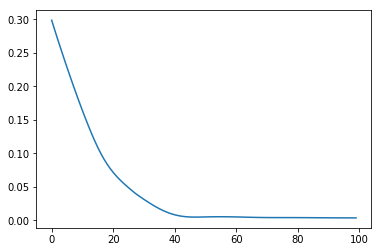

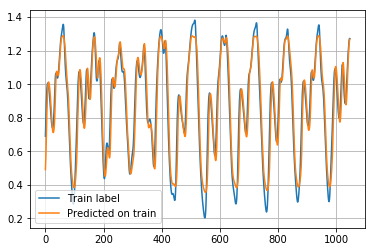

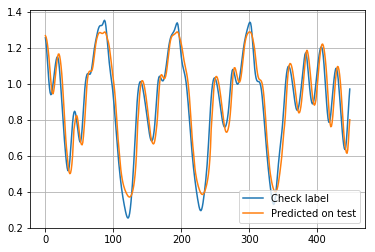

In [60]:
# visulization results
import matplotlib.pyplot as plt
%matplotlib inline

# loss over epoch
plt.figure()
plt.plot(losses)

# Train data: yp & trnLbls
plt.figure()
plt.plot(trnLbls, label='Train label')
plt.plot(yp, label='Predicted on train')
plt.grid(True)
plt.legend()

# Test data
pred_test = sess.run(outs, {inputs: chkData})
plt.figure()
plt.plot(chkLbls, label='Check label')
plt.plot(pred_test, label='Predicted on test')
plt.grid(True)
plt.legend()